In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Settings to produce nice plots in a Jupyter notebook
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
# Reading the data 
df = pd.read_csv("datasets/RisksAndReturns/stock_data.csv")
stock_data = pd.read_csv('datasets/RisksAndReturns/stock_data.csv')
benchmark_data = pd.read_csv('datasets/RisksAndReturns/benchmark_data.csv') 


# 2. A first glance at the data
Let's take a look the data to find out how many observations and variables we have at our disposal.

In [4]:
# Display the data
print("                       Stock Data")
print(stock_data.head(5))

print()

print("                       S&P 500 Stock Data")
print(benchmark_data.head(5))

                       Stock Data
         Date      Amazon    Facebook
0  2016-01-04  636.989990  102.220001
1  2016-01-05  633.789978  102.730003
2  2016-01-06  632.650024  102.970001
3  2016-01-07  607.940002   97.919998
4  2016-01-08  607.049988   97.330002

                       S&P 500 Stock Data
         Date  S&P 500
0  2016-01-01      NaN
1  2016-01-04  2012.66
2  2016-01-05  2016.71
3  2016-01-06  1990.26
4  2016-01-07  1943.09


# 3. Plot & summarize daily prices for Amazon and Facebook
Before we compare an investment in either Facebook or Amazon with the index of the 500 largest companies in the US, let's visualize the data, so we better understand what we're dealing with.

array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

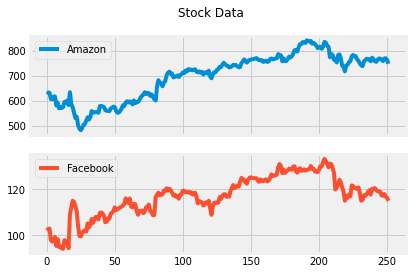

In [5]:
# visualize the stock_data
stock_data.plot(subplots=True, title='Stock Data')

In [6]:
# summarize the stock_data
stock_data.describe()


,Amazon,Facebook
count,252.000000,252.000000
mean,699.523135,117.035873
std,92.362312,8.899858
min,482.070007,94.160004
25%,606.929993,112.202499
50%,727.875000,117.765000
75%,767.882492,123.902502
max,844.359985,133.279999


# 4. Visualize & summarize daily values for the S&P 500
Let's also take a closer look at the value of the S&P 500, our benchmark.

<AxesSubplot:>

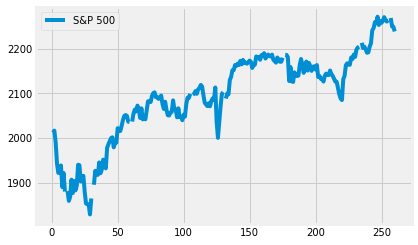

In [7]:
# plot the benchmark_data
benchmark_data.plot()

In [8]:
# summarize the benchmark_data
benchmark_data.describe()

,S&P 500
count,252.000000
mean,2094.651310
std,101.427615
min,1829.080000
25%,2047.060000
50%,2104.105000
75%,2169.075000
max,2271.720000


# 5. The inputs for the Sharpe Ratio: Starting with Daily Stock Returns
The Sharpe Ratio uses the difference in returns between the two investment opportunities under consideration.

However, our data show the historical value of each investment, not the return. To calculate the return, we need to calculate the percentage change in value from one day to the next. We'll also take a look at the summary statistics because these will become our inputs as we calculate the Sharpe Ratio.

In [9]:
#                      calculate daily stock_data returns
# Create an empty array
stock_returns = pd.DataFrame()

stock_returns['Date'] = stock_data['Date']
stock_returns['Amazon'] = stock_data['Amazon'].pct_change()
stock_returns['Facebook'] = stock_data['Facebook'].pct_change()

stock_returns

,Date,Amazon,Facebook
0,2016-01-04,NaN,NaN
1,2016-01-05,-0.005024,0.004989
2,2016-01-06,-0.001799,0.002336
3,2016-01-07,-0.039058,-0.049043
4,2016-01-08,-0.001464,-0.006025
...,...,...,...
247,2016-12-23,-0.007503,-0.001107
248,2016-12-27,0.014213,0.006310
249,2016-12-28,0.000946,-0.009237
250,2016-12-29,-0.009040,-0.004875


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

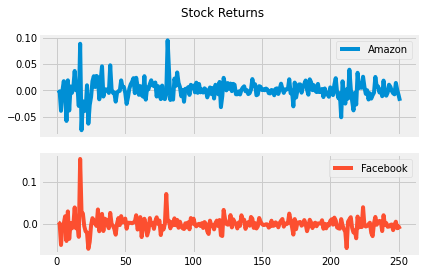

In [10]:
# Plot the daily returns
stock_returns.plot(subplots=True, title='Stock Returns')

In [11]:
# summarize the daily returns
stock_returns.describe()

,Amazon,Facebook
count,251.000000,251.000000
mean,0.000818,0.000626
std,0.018383,0.017840
min,-0.076100,-0.058105
25%,-0.007211,-0.007220
50%,0.000857,0.000879
75%,0.009224,0.008108
max,0.095664,0.155214


# 6. Daily S&P 500 returns
For the S&P 500, calculating daily returns works just the same way, we just need to make sure we select it as a Series using single brackets [] and not as a DataFrame to facilitate the calculations in the next step.

In [12]:
#                      calculate daily S&P 500 returns
# Create an empty array
sp_returns = pd.DataFrame()

# calculate the returns
sp_returns['Date'] = benchmark_data['Date']
sp_returns['S&P 500'] = benchmark_data['S&P 500'].pct_change()


sp_returns

,Date,S&P 500
0,2016-01-01,NaN
1,2016-01-04,NaN
2,2016-01-05,0.002012
3,2016-01-06,-0.013115
4,2016-01-07,-0.023700
...,...,...
256,2016-12-26,0.000000
257,2016-12-27,0.002248
258,2016-12-28,-0.008357
259,2016-12-29,-0.000293


array([<AxesSubplot:>], dtype=object)

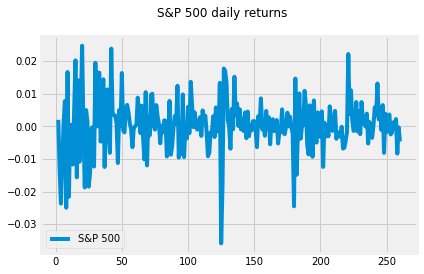

In [13]:
# Plot the daily returns
sp_returns.plot(subplots=True, title='S&P 500 daily returns')

In [14]:
# Summarize the S&P 500 daily returns
sp_returns.describe()

,S&P 500
count,259.000000
mean,0.000444
std,0.008078
min,-0.035920
25%,-0.002802
50%,0.000135
75%,0.004378
max,0.024760


# 7. Calculating Excess Returns for Amazon and Facebook vs. S&P 500
Next, we need to calculate the relative performance of stocks vs. the S&P 500 benchmark. This is calculated as the difference in returns between stock_returns and sp_returns for each day.

Next, we need to calculate the relative performance of stocks vs. the S&P 500 benchmark. This is calculated as the difference in returns between stock_returns and sp_returns for each day

In [15]:
excess_returns = pd.DataFrame()

excess_returns['Date'] = stock_data['Date']
excess_returns['Amazon Diff'] = stock_returns['Amazon'].sub(sp_returns['S&P 500'])
excess_returns['Facebook Diff'] = stock_returns['Facebook'].sub(sp_returns['S&P 500'])

excess_returns = excess_returns.dropna()

print(excess_returns)

           Date  Amazon Diff  Facebook Diff
2    2016-01-06    -0.003811       0.000324
3    2016-01-07    -0.025943      -0.035928
4    2016-01-08     0.022236       0.017675
5    2016-01-11     0.028448       0.012688
6    2016-01-12    -0.000610       0.018222
..          ...          ...            ...
247  2016-12-23    -0.014043      -0.007647
248  2016-12-27     0.022330       0.014427
249  2016-12-28    -0.002937      -0.013120
250  2016-12-29    -0.007289      -0.003124
251  2016-12-30    -0.021945      -0.013148

[250 rows x 3 columns]


array([<AxesSubplot:>, <AxesSubplot:>], dtype=object)

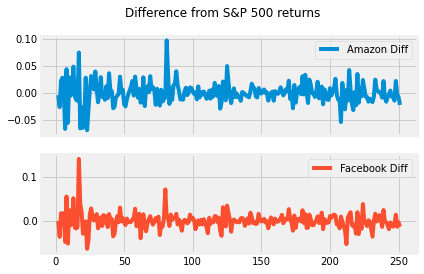

In [16]:
# Plot the excess returns
excess_returns.plot(subplots=True, title='Difference from S&P 500 returns')


In [17]:
# Summarize the difference in returns
excess_returns.describe()

,Amazon Diff,Facebook Diff
count,250.000000,250.000000
mean,0.000340,0.000106
std,0.020052,0.018859
min,-0.068637,-0.063097
25%,-0.010075,-0.007665
50%,0.000106,-0.000845
75%,0.008596,0.007842
max,0.097477,0.141070


# 8. The Sharpe Ratio, Step 1: The Average Difference in Daily Returns Stocks vs S&P 500
Now we can finally start computing the Sharpe Ratio. First we need to calculate the average of the excess_returns. This tells us how much more or less the investment yields per day compared to the benchmark.

In [20]:
# calculate the mean of excess_returns 
avg_excess_return = excess_returns.mean()

avg_excess_return

c:\users\cresp\pycharmprojects\dataanalysisprojects\venv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Amazon Diff      0.000340
Facebook Diff    0.000106
dtype: float64

In [19]:
# plot avg_excess_returns
# ... YOUR CODE FOR TASK 8 HERE ...

<AxesSubplot:title={'center':'Mean of the Return Difference'}>

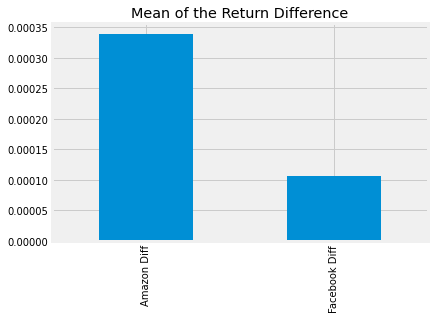

In [23]:
# plot avg_excess_returns
avg_excess_return.plot.bar(title='Mean of the Return Difference')

# 9. The Sharpe Ratio, Step 2: Standard Deviation of the Return Difference
It looks like there was quite a bit of a difference between average daily returns for Amazon and Facebook.

Next, we calculate the standard deviation of the excess_returns. This shows us the amount of risk an investment in the stocks implies as compared to an investment in the S&P 500.

In [24]:
# calculate the standard deviations
sd_excess_return = excess_returns.std()

sd_excess_return

c:\users\cresp\pycharmprojects\dataanalysisprojects\venv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Amazon Diff      0.020052
Facebook Diff    0.018859
dtype: float64

<AxesSubplot:title={'center':'Standard Deviation of the Return Difference'}>

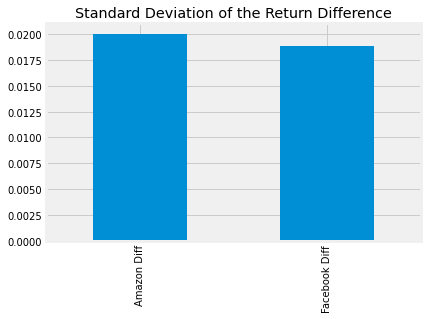

In [25]:
# plot the standard deviations
sd_excess_return.plot.bar(title='Standard Deviation of the Return Difference')

# 10. Putting it all together
Now we just need to compute the ratio of avg_excess_returns and sd_excess_returns. The result is now finally the Sharpe ratio and indicates how much more (or less) return the investment opportunity under consideration yields per unit of risk.

The Sharpe Ratio is often annualized by multiplying it by the square root of the number of periods. We have used daily data as input, so we'll use the square root of the number of trading days (5 days, 52 weeks, minus a few holidays): √252

In [26]:
# calculate the daily sharpe ratio
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return)

daily_sharpe_ratio

Amazon Diff      0.016933
Facebook Diff    0.005644
dtype: float64

In [27]:
# annualize the sharpe ratio
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor)

In [28]:
annual_sharpe_ratio

Amazon Diff      0.268807
Facebook Diff    0.089595
dtype: float64

11. Conclusion
Given the two Sharpe ratios, which investment should we go for? In 2016, Amazon had a Sharpe ratio twice as high as Facebook. This means that an investment in Amazon returned twice as much compared to the S&P 500 for each unit of risk an investor would have assumed. In other words, in risk-adjusted terms, the investment in Amazon would have been more attractive.

This difference was mostly driven by differences in return rather than risk between Amazon and Facebook. The risk of choosing Amazon over FB (as measured by the standard deviation) was only slightly higher so that the higher Sharpe ratio for Amazon ends up higher mainly due to the higher average daily returns for Amazon.

When faced with investment alternatives that offer both different returns and risks, the Sharpe Ratio helps to make a decision by adjusting the returns by the differences in risk and allows an investor to compare investment opportunities on equal terms, that is, on an 'apples-to-apples' basis